# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 09 vs Chr 09 Inversion

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [2]:
iterationNumber = 4

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_1L.bmp',
   'D:\\Users\

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_09']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_3L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_18L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_3L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_7L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_9L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_20L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_8L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangeme

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
  'D:\\Users\\Chuan\\Docume

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_09', 'chr_9_inversion'])

In [8]:
print('Iteration No. ', iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    print('   Train: ')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
    print('   Test: ')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])

Iteration No.  4
chr_09
   Train: 
        193002-9p12q13_11L.bmp
        193002-9p12q13_12L.bmp
        193002-9p12q13_14L.bmp
        193002-9p12q13_15L.bmp
        193002-9p12q13_16L.bmp
        193002-9p12q13_18L.bmp
        193002-9p12q13_19L.bmp
        193002-9p12q13_2L.bmp
        193002-9p12q13_3L.bmp
        193002-9p12q13_4L.bmp
        193002-9p12q13_5L.bmp
        193002-9p12q13_6L.bmp
        193002-9p12q13_7L.bmp
        193002-9p12q13_8L.bmp
        193002-9p12q13_9L.bmp
        W07391-9p12q_10L.bmp
        W07391-9p12q_11L.bmp
        W07391-9p12q_12L.bmp
        W07391-9p12q_13L.bmp
        W07391-9p12q_15L.bmp
        W07391-9p12q_16L.bmp
        W07391-9p12q_17L.bmp
        W07391-9p12q_18L.bmp
        W07391-9p12q_19L.bmp
        W07391-9p12q_1L.bmp
        W07391-9p12q_20L.bmp
        W07391-9p12q_21L.bmp
        W07391-9p12q_2L.bmp
        W07391-9p12q_3L.bmp
        W07391-9p12q_4L.bmp
        W07391-9p12q_5L.bmp
        W07391-9p12q_6L.bmp
        W07391-9p12q_

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

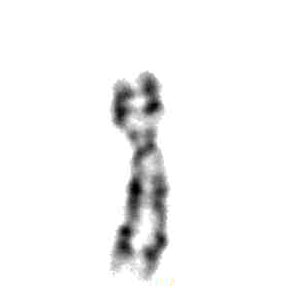

In [12]:
image['chr_09'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [13]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [14]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [15]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {
               'chr_09': 0, 
               'chr_9_inversion': 1
               }

In [19]:
chromConvert_reverse = {
                0: 'chr_09',
                1: 'chr_9_inversion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
len(X_train)

371

In [25]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [26]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [29]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [30]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/100
6/6 [==============================] - 7s 716ms/step - loss: 18.3070 - accuracy: 0.4933 - val_loss: 0.6790 - val_accuracy: 0.5968
Epoch 2/100
6/6 [==============================] - 1s 137ms/step - loss: 0.7464 - accuracy: 0.5687 - val_loss: 0.7614 - val_accuracy: 0.5968
Epoch 3/100
6/6 [==============================] - 1s 134ms/step - loss: 0.7679 - accuracy: 0.5526 - val_loss: 0.6927 - val_accuracy: 0.5968
Epoch 4/100
6/6 [==============================] - 1s 126ms/step - loss: 0.6921 - accuracy: 0.6065 - val_loss: 0.6916 - val_accuracy: 0.5968
Epoch 5/100
6/6 [==============================] - 1s 127ms/step - loss: 0.6908 - accuracy: 0.6011 - val_loss: 0.6903 - val_accuracy: 0.5968
Epoch 6/100
6/6 [==============================] - 1s 129ms/step - loss: 0.8330 - accuracy: 0.6146 - val_loss: 0.6881 - val_accuracy: 0.6774
Epoch 7/100
6/6 [==============================] - 1s 130ms/step - loss: 0.6695 - accuracy: 0.7170 - val_loss: 0.6474 - val_accuracy: 0.4677
Epoch 8/100


Epoch 59/100
6/6 [==============================] - 1s 127ms/step - loss: 0.0021 - accuracy: 0.9973 - val_loss: 2.8798 - val_accuracy: 0.8710
Epoch 60/100
6/6 [==============================] - 1s 128ms/step - loss: 0.0021 - accuracy: 0.9973 - val_loss: 2.9090 - val_accuracy: 0.8710
Epoch 61/100
6/6 [==============================] - 1s 128ms/step - loss: 0.0021 - accuracy: 0.9973 - val_loss: 2.9384 - val_accuracy: 0.8710
Epoch 62/100
6/6 [==============================] - 1s 130ms/step - loss: 0.0021 - accuracy: 0.9973 - val_loss: 2.9691 - val_accuracy: 0.8710
Epoch 63/100
6/6 [==============================] - 1s 130ms/step - loss: 0.0020 - accuracy: 0.9973 - val_loss: 2.9983 - val_accuracy: 0.8710
Epoch 64/100
6/6 [==============================] - 1s 127ms/step - loss: 0.0020 - accuracy: 0.9973 - val_loss: 3.0247 - val_accuracy: 0.8710
Epoch 65/100
6/6 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.99 - 1s 127ms/step - loss: 0.0020 - accuracy: 0.9973 - val_

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               9

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19756), started 14:13:58 ago. (Use '!kill 19756' to kill it.)

## 3.8 Save the Model

In [35]:
model.save('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_09_cnn_iteration_4\assets


## 3.9 Load the Model

In [36]:
model_reload = keras.models.load_model('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [37]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.839


In [38]:
len(X_test)

62

In [39]:
y_predict = model_reload.predict(X_test)

In [40]:
len(y_predict)

62

In [41]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [42]:
len(y_predict_filtered)

62

In [43]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.2. Classification Report

In [44]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.86      0.86      0.86        37
chr_9_inversion       0.80      0.80      0.80        25

      micro avg       0.84      0.84      0.84        62
      macro avg       0.83      0.83      0.83        62
   weighted avg       0.84      0.84      0.84        62



### 3.10.3. Confusion Matrix

In [45]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_09_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,32,5
chr_9_inversion,5,20


#### Heat Map

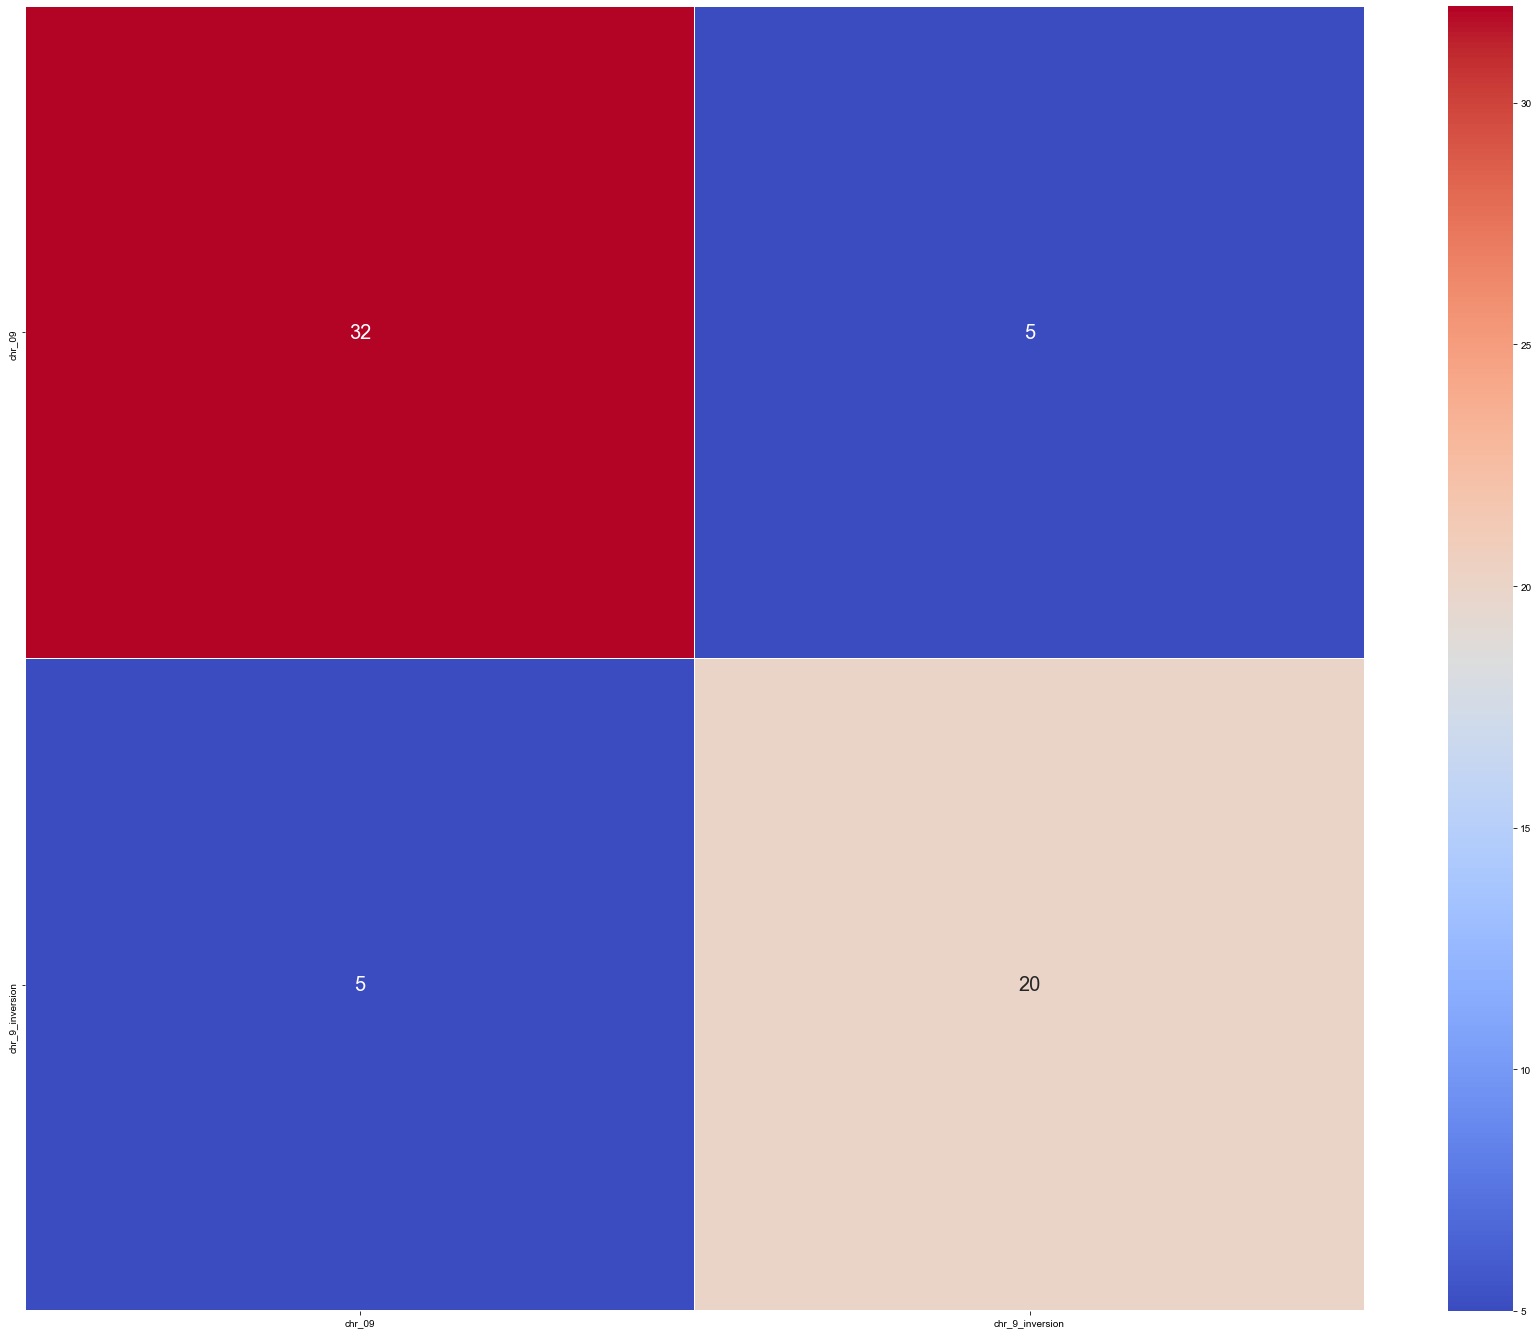

In [46]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [47]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_09_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [48]:
y_predict

array([[1.0000000e+00, 1.0000000e+00],
       [7.5936746e-03, 9.9981755e-01],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.9999988e-01],
       [2.6322463e-01, 9.6210366e-01],
       [9.8207217e-01, 8.6384046e-01],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.9999726e-01],
       [1.0000000e+00, 9.9962831e-01],
       [1.0000000e+00, 9.9999011e-01],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.9999988e-01],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00],
       [9.9992907e-01, 9.7000140e-01],
       [4.8104171e-03, 9.9985576e-01],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.9997568e-01],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.

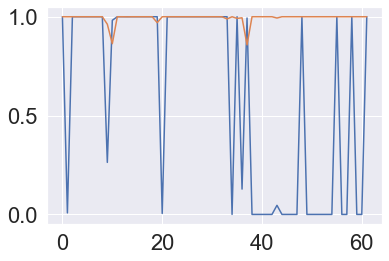

In [49]:
plt.plot(y_predict)

In [50]:
y_predict_1D = y_predict[:,0]

In [51]:
y_predict_1D_processed = 1- y_predict_1D

In [52]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [53]:
auc_rf

0.8897297297297297

In [54]:
x = y = np.arange(0,1.1,0.1)

In [55]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

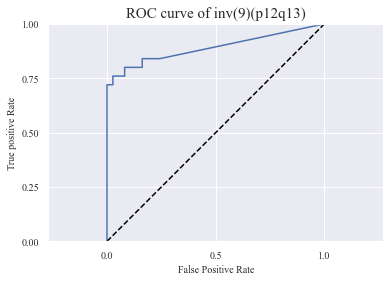

In [56]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of inv(9)(p12q13)', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_09_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [57]:
auc_value = auc(fpr, tpr)

In [58]:
print('AUC is ', auc_value)

AUC is  0.8897297297297297


# Results

In [59]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.839


In [60]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.86      0.86      0.86        37
chr_9_inversion       0.80      0.80      0.80        25

      micro avg       0.84      0.84      0.84        62
      macro avg       0.83      0.83      0.83        62
   weighted avg       0.84      0.84      0.84        62



In [61]:
type(performanceReport)

str

In [62]:
confusion

,chr_09,chr_9_inversion
chr_09,32,5
chr_9_inversion,5,20


In [63]:
print('AUC is ', auc_value)

AUC is  0.8897297297297297


## Export to a text file

In [64]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()